In [19]:
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

#load data
#Data for accepted loans - Lending Club(LC)
print('Loading LC data')
dfAcc07_11 = pd.read_csv('P2PLendingData/LoanStats3a_securev1.csv', engine='python')
dfAcc12_13 = pd.read_csv('P2PLendingData/LoanStats3b_securev1.csv', engine='python')
dfAcc14 = pd.read_csv('P2PLendingData/LoanStats3c_securev1.csv', engine='python')
dfAcc15 = pd.read_csv('P2PLendingData/LoanStats3d_securev1.csv', engine='python')
dfAcc16Q1 = pd.read_csv('P2PLendingData/LoanStats_securev1_2016Q1.csv', engine='python')
dfAcc16Q2 = pd.read_csv('P2PLendingData/LoanStats_securev1_2016Q2.csv', engine='python')
dfAcc16Q3 = pd.read_csv('P2PLendingData/LoanStats_securev1_2016Q3.csv', engine='python')
dfAcc16Q4 = pd.read_csv('P2PLendingData/LoanStats_securev1_2016Q4.csv', engine='python')
dfAcc17Q1 = pd.read_csv('P2PLendingData/LoanStats_securev1_2017Q1.csv', engine='python')
dfAcc17Q2 = pd.read_csv('P2PLendingData/LoanStats_securev1_2017Q2.csv', engine='python')
dfAcc17Q3 = pd.read_csv('P2PLendingData/LoanStats_securev1_2017Q3.csv', engine='python')

#Data for rejected loans - Lending Club
#dfRej07_12 = pd.read_csv('P2PLendingData/RejectStatsA.csv', sep='","', engine='python')
#dfRej13_14 = pd.read_csv('P2PLendingData/RejectStatsB.csv', sep='","', engine='python')
#dfRej15 = pd.read_csv('P2PLendingData/RejectStatsD.csv', sep='","', engine='python')
#dfRej16Q1 = pd.read_csv('P2PLendingData/RejectStats_2016Q1.csv', sep='","', engine='python')
#dfRej16Q2 = pd.read_csv('P2PLendingData/RejectStats_2016Q2.csv', sep='","', engine='python')
#dfRej16Q3 = pd.read_csv('P2PLendingData/RejectStats_2016Q3.csv', sep='","', engine='python')
#dfRej16Q4 = pd.read_csv('P2PLendingData/RejectStats_2016Q4.csv', sep='","', engine='python')
#dfRej17Q1 = pd.read_csv('P2PLendingData/RejectStats_2017Q1.csv', sep='","', engine='python')
#dfRej17Q2 = pd.read_csv('P2PLendingData/RejectStats_2017Q2.csv', sep='","', engine='python')
#dfRej17Q3 = pd.read_csv('P2PLendingData/RejectStats_2017Q3.csv', sep='","', engine='python')

print('Loading Prosper data')
#Data for Prosper
#dfProsp = pd.read_csv('P2PLendingData/prosperLoanData.csv', engine='python')

print('Joining LC data')
#Join LC data sets
LCframes = [dfAcc07_11, dfAcc12_13, dfAcc14, dfAcc15, dfAcc16Q1, dfAcc16Q2, dfAcc16Q3, dfAcc16Q4, 
            dfAcc17Q1, dfAcc17Q2, dfAcc17Q3]
dfLC = pd.concat(LCframes)

print('slicing relevant LC data')



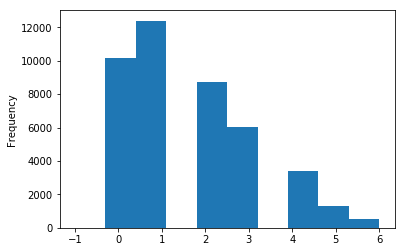

In [18]:
dftest = dfAcc07_11['grade']
dftest.astype('category').cat.codes

plt.figure()
dftest.astype('category').cat.codes.plot.hist()
#dftest = pd.Categorical(dftest);
#dftest['code']= dftest.cat.codes
#dftest.head()
#dftest[].value_counts().plot(kind='bar')


C:\Users\Eric\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Eric\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Eric\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

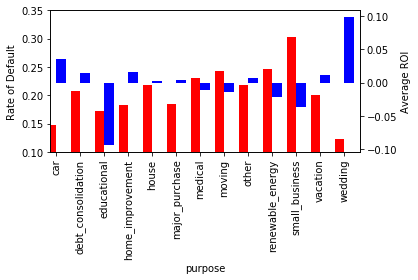

   loan_amnt grade             purpose  funded_amnt  annual_inc    dti  \
0     5000.0     B  debt_consolidation       5000.0     24000.0  27.65   
1     2500.0     C                 car       2500.0     30000.0   1.00   
2     2400.0     C      small_business       2400.0     12252.0   8.72   
3    10000.0     C               other      10000.0     49200.0  20.00   
4     3000.0     B               other       3000.0     80000.0  17.94   

   fico_range_low  total_pymnt_inv  loan_status addr_state    ...     \
0           735.0          5833.84   Fully Paid         AZ    ...      
1           740.0          1014.53  Charged Off         GA    ...      
2           735.0          3005.67   Fully Paid         IL    ...      
3           690.0         12231.89   Fully Paid         CA    ...      
4           695.0          4066.91   Fully Paid         OR    ...      

  home_ownership  loan_statusbin termint  AnnReturn  FullReturn  gradecode  \
0           RENT               0      36   0

In [230]:
dfLCsliced = pd.DataFrame(dfLC, columns=["loan_amnt", 
                                        "grade", "purpose", 
                                        "funded_amnt", "annual_inc", 
                                        "dti", "fico_range_low", 
                                        "total_pymnt_inv", "loan_status",
                                        "addr_state", "term", "int_rate",
                                        "home_ownership"])
matured = dfLCsliced['loan_status'] == "Fully Paid"
defaulted = dfLCsliced['loan_status'] == "Charged Off"
#keep only loans that have been closed
dfLC_Fpymt = dfLCsliced[matured | defaulted]

#make some replacements for working more easily with the data
#credit card and debt consolidation will be considered the same
dfLC_Fpymt['purpose']=dfLC_Fpymt['purpose'].replace('credit_card', 'debt_consolidation')
#replace the labeling of charged off and fully paid with binary values
dfLC_Fpymt['loan_statusbin']=dfLC_Fpymt['loan_status'].replace({'Charged Off': 1, 'Fully Paid': 0})
#number of months should be numbers
dfLC_Fpymt['termint']=dfLC_Fpymt['term'].replace({' 36 months': 36, ' 60 months': 60})

#convert interest rate to float
dfLC_Fpymt['int_rate'] = dfLC_Fpymt['int_rate'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100


#the total recovered
Loan = pd.Series(dfLC_Fpymt['loan_amnt'])
#the total paid
Paid = pd.Series(dfLC_Fpymt['total_pymnt_inv'])
#number of months on the loan
Length = pd.Series(dfLC_Fpymt['termint'])
#calculate return on investment on average for a year
AnnReturn = Paid/Loan/Length*12  #average return per year
FullReturn = (Paid-Loan)/Loan #full return percentage

dfLC_Fpymt['AnnReturn'] = AnnReturn
dfLC_Fpymt['FullReturn'] = FullReturn

#get table of statistics to plot bar graph
#dfLC_Fpymt.purpose.unique()
dfLCPurpStats = dfLC_Fpymt.groupby(['purpose']).describe() #any of the categories can be used here to plot

#plot the default rate and ROI for every 

fig = plt.figure()

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width=0.4

dfLCPurpStats.loan_statusbin['mean'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
dfLCPurpStats.FullReturn['mean'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Rate of Default')
ax.set_ylim(0.1,0.35)
ax2.set_ylabel('Average ROI')

plt.tight_layout()
plt.savefig('DefaultsAndROIbyPurpose.png')
plt.show()

#dfLC_Fpymt.groupby(['purpose']).sum()  #calculate sums to look at

#lets drop the nan's
dfLC_Fpymt = dfLC_Fpymt.dropna(axis=0, how='any')

#let's use the Naive Bayes Classifier as a start on predicting the data
#get all continuous data together
LoanAmount = dfLC_Fpymt.values[:,0].astype(float)
Income = dfLC_Fpymt.values[:,4].astype(float)
DTI = dfLC_Fpymt.values[:,5].astype(float)
FICO = dfLC_Fpymt.values[:,6].astype(float)
IntRate = dfLC_Fpymt.values[:,11].astype(float)

#combine as numpy array
ContDat = np.stack((LoanAmount, Income, DTI, FICO, IntRate), axis=1)

#change certain pieces to categories
dfLC_Fpymt.grade = pd.Categorical(dfLC_Fpymt.grade)
dfLC_Fpymt.purpose = pd.Categorical(dfLC_Fpymt.purpose)
dfLC_Fpymt.addr_state = pd.Categorical(dfLC_Fpymt.addr_state)
dfLC_Fpymt.term = pd.Categorical(dfLC_Fpymt.term)
dfLC_Fpymt.home_ownership = pd.Categorical(dfLC_Fpymt.home_ownership)

#create categorical codes for multinomial regression
dfLC_Fpymt['gradecode'] = dfLC_Fpymt.grade.cat.codes
dfLC_Fpymt['purpcode'] = dfLC_Fpymt.purpose.cat.codes
dfLC_Fpymt['statecode'] = dfLC_Fpymt.addr_state.cat.codes
dfLC_Fpymt['termcode'] = dfLC_Fpymt.term.cat.codes
dfLC_Fpymt['homecode'] = dfLC_Fpymt.home_ownership.cat.codes

print dfLC_Fpymt.head()

#now the multinomial data
Grade = dfLC_Fpymt.values[:,17].astype(int)
Purpose = dfLC_Fpymt.values[:,18].astype(int)
State = dfLC_Fpymt.values[:,19].astype(int)
Term = dfLC_Fpymt.values[:,20].astype(int)
HomeOwn = dfLC_Fpymt.values[:,21].astype(int)

#combine as numpy array
MultiDat = np.stack((Grade, Purpose, State, Term, HomeOwn), axis=1)

print MultiDat

#Possible target data
Status = dfLC_Fpymt.values[:,13].astype(str)
ROI = dfLC_Fpymt.values[:,16].astype(float)



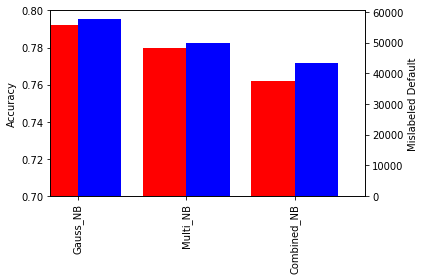

             Accuracy  Mislabeled_Default
Gauss_NB     0.791915               57655
Multi_NB     0.779540               49997
Combined_NB  0.761710               43278
Gauss_NB       57655
Multi_NB       49997
Combined_NB    43278
Name: Mislabeled_Default, dtype: int64
[[198189  23290]
 [ 43278  14600]]
43278


In [229]:
import sklearn as skl

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Cont_train, Cont_test, Multi_train, Multi_test, Stat_train, Stat_test = train_test_split(ContDat, MultiDat, Status, test_size = 0.33, random_state = 73)

#Gaussian Naive Bayes on continuous data
gnb = GaussianNB()
gnbmodel = gnb.fit(Cont_train, Stat_train)
ygauss_pred = gnbmodel.predict(Cont_test)
ygauss_proba = gnbmodel.predict_proba(ContDat) #new features for combining models

#multinomial naive Bayes on categorical data
mnb = MultinomialNB()
mnbmodel = mnb.fit(Multi_train, Stat_train)
ymult_pred = mnbmodel.predict(Multi_test)
ymult_proba = mnbmodel.predict_proba(MultiDat) #new features for combining models

Cfgauss = confusion_matrix(Stat_test, ygauss_pred)
Accgauss = accuracy_score(Stat_test, ygauss_pred)
Cfmult = confusion_matrix(Stat_test, ymult_pred)
Accmult = accuracy_score(Stat_test, ymult_pred)

Probafeats = np.hstack((ygauss_proba, ymult_proba))
Proba_train, Proba_test, Stat_train, Stat_test = train_test_split(Probafeats, Status, test_size = 0.33, random_state = 73)

#new Gaussian model
gnb2model = gnb.fit(Proba_train, Stat_train)
ygauss2_pred = gnbmodel.predict(Proba_test)

Cfgauss2 = confusion_matrix(Stat_test, ygauss2_pred)
Accgauss2 = accuracy_score(Stat_test, ygauss2_pred)

NextDat = {'Accuracy': [Accgauss, Accmult, Accgauss2], 'Mislabeled_Default':[Cfgauss[1,0], Cfmult[1,0], Cfgauss2[1,0]]}

dfAccuracy = pd.DataFrame(data=NextDat, index =['Gauss_NB', 'Multi_NB', 'Combined_NB'])

#plot the different model accuracies and Defaults that were mislabeled

fig2 = plt.figure()#

ax3 = fig2.add_subplot(111) # Create matplotlib axes
ax4 = ax3.twinx() # Create another axes that shares the same x-axis as ax.

width=0.4

dfAccuracy['Accuracy'].plot(kind='bar', color='red', ax=ax3, width=width, position=1)
dfAccuracy['Mislabeled_Default'].plot(kind='bar', color='blue', ax=ax4, width=width, position=0)

ax3.set_ylabel('Accuracy')
ax3.set_ylim(0.7,0.8)
ax4.set_ylabel('Mislabeled Default')

plt.tight_layout()
plt.savefig('AccuracyAndMislabels.png')
plt.show()

print dfAccuracy.head()
print dfAccuracy.Mislabeled_Default
print Cfgauss2
print Cfgauss2[1,0]

Loading LC data
Loading Prosper data
Joining LC data
slicing relevant LC data


C:\Users\Eric\Anaconda2\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Eric\Anaconda2\lib\site-packages\ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Eric\Anaconda2\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

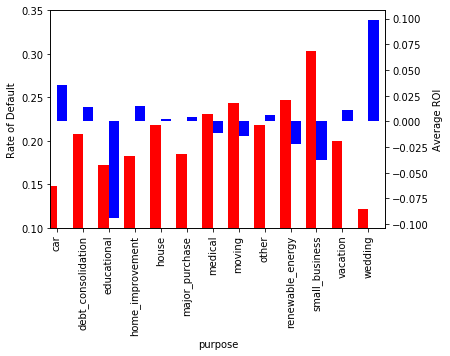

   loan_amnt grade             purpose  funded_amnt  annual_inc    dti  \
0     5000.0     B  debt_consolidation       5000.0     24000.0  27.65   
1     2500.0     C                 car       2500.0     30000.0   1.00   
2     2400.0     C      small_business       2400.0     12252.0   8.72   
3    10000.0     C               other      10000.0     49200.0  20.00   
4     3000.0     B               other       3000.0     80000.0  17.94   

   fico_range_low  total_pymnt_inv  loan_status addr_state    ...     \
0           735.0          5833.84   Fully Paid         AZ    ...      
1           740.0          1014.53  Charged Off         GA    ...      
2           735.0          3005.67   Fully Paid         IL    ...      
3           690.0         12231.89   Fully Paid         CA    ...      
4           695.0          4066.91   Fully Paid         OR    ...      

  home_ownership  loan_statusbin termint  AnnReturn  FullReturn  gradecode  \
0           RENT               0      36   0

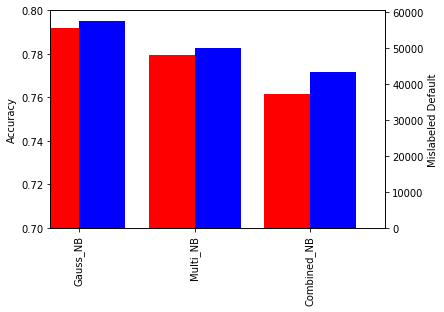

             Accuracy  Mislabeled_Default
Gauss_NB     0.791915               57655
Multi_NB     0.779540               49997
Combined_NB  0.761710               43278
Gauss_NB       57655
Multi_NB       49997
Combined_NB    43278
Name: Mislabeled_Default, dtype: int64
[[198189  23290]
 [ 43278  14600]]
43278


In [224]:
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

#load data
#Data for accepted loans - Lending Club(LC)
#lending club data at
#https://www.lendingclub.com/info/download-data.action
print('Loading LC data')
dfAcc07_11 = pd.read_csv('P2PLendingData/LoanStats3a_securev1.csv', engine='python')
dfAcc12_13 = pd.read_csv('P2PLendingData/LoanStats3b_securev1.csv', engine='python')
dfAcc14 = pd.read_csv('P2PLendingData/LoanStats3c_securev1.csv', engine='python')
dfAcc15 = pd.read_csv('P2PLendingData/LoanStats3d_securev1.csv', engine='python')
dfAcc16Q1 = pd.read_csv('P2PLendingData/LoanStats_securev1_2016Q1.csv', engine='python')
dfAcc16Q2 = pd.read_csv('P2PLendingData/LoanStats_securev1_2016Q2.csv', engine='python')
dfAcc16Q3 = pd.read_csv('P2PLendingData/LoanStats_securev1_2016Q3.csv', engine='python')
dfAcc16Q4 = pd.read_csv('P2PLendingData/LoanStats_securev1_2016Q4.csv', engine='python')
dfAcc17Q1 = pd.read_csv('P2PLendingData/LoanStats_securev1_2017Q1.csv', engine='python')
dfAcc17Q2 = pd.read_csv('P2PLendingData/LoanStats_securev1_2017Q2.csv', engine='python')
dfAcc17Q3 = pd.read_csv('P2PLendingData/LoanStats_securev1_2017Q3.csv', engine='python')

#Data for rejected loans - Lending Club
#dfRej07_12 = pd.read_csv('P2PLendingData/RejectStatsA.csv', sep='","', engine='python')
#dfRej13_14 = pd.read_csv('P2PLendingData/RejectStatsB.csv', sep='","', engine='python')
#dfRej15 = pd.read_csv('P2PLendingData/RejectStatsD.csv', sep='","', engine='python')
#dfRej16Q1 = pd.read_csv('P2PLendingData/RejectStats_2016Q1.csv', sep='","', engine='python')
#dfRej16Q2 = pd.read_csv('P2PLendingData/RejectStats_2016Q2.csv', sep='","', engine='python')
#dfRej16Q3 = pd.read_csv('P2PLendingData/RejectStats_2016Q3.csv', sep='","', engine='python')
#dfRej16Q4 = pd.read_csv('P2PLendingData/RejectStats_2016Q4.csv', sep='","', engine='python')
#dfRej17Q1 = pd.read_csv('P2PLendingData/RejectStats_2017Q1.csv', sep='","', engine='python')
#dfRej17Q2 = pd.read_csv('P2PLendingData/RejectStats_2017Q2.csv', sep='","', engine='python')
#dfRej17Q3 = pd.read_csv('P2PLendingData/RejectStats_2017Q3.csv', sep='","', engine='python')

#Prosper data at 
#https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv
print('Loading Prosper data')
#Data for Prosper
#dfProsp = pd.read_csv('P2PLendingData/prosperLoanData.csv', engine='python')

print('Joining LC data')
#Join LC data sets
LCframes = [dfAcc07_11, dfAcc12_13, dfAcc14, dfAcc15, dfAcc16Q1, dfAcc16Q2, dfAcc16Q3, dfAcc16Q4, 
            dfAcc17Q1, dfAcc17Q2, dfAcc17Q3]
dfLC = pd.concat(LCframes)

print('slicing relevant LC data')

dfLCsliced = pd.DataFrame(dfLC, columns=["loan_amnt", 
                                        "grade", "purpose", 
                                        "funded_amnt", "annual_inc", 
                                        "dti", "fico_range_low", 
                                        "total_pymnt_inv", "loan_status",
                                        "addr_state", "term", "int_rate",
                                        "home_ownership"])
matured = dfLCsliced['loan_status'] == "Fully Paid"
defaulted = dfLCsliced['loan_status'] == "Charged Off"
#keep only loans that have been closed
dfLC_Fpymt = dfLCsliced[matured | defaulted]

#make some replacements for working more easily with the data
#credit card and debt consolidation will be considered the same
dfLC_Fpymt['purpose']=dfLC_Fpymt['purpose'].replace('credit_card', 'debt_consolidation')
#replace the labeling of charged off and fully paid with binary values
dfLC_Fpymt['loan_statusbin']=dfLC_Fpymt['loan_status'].replace({'Charged Off': 1, 'Fully Paid': 0})
#number of months should be numbers
dfLC_Fpymt['termint']=dfLC_Fpymt['term'].replace({' 36 months': 36, ' 60 months': 60})

#convert interest rate to float
dfLC_Fpymt['int_rate'] = dfLC_Fpymt['int_rate'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100


#the total recovered
Loan = pd.Series(dfLC_Fpymt['loan_amnt'])
#the total paid
Paid = pd.Series(dfLC_Fpymt['total_pymnt_inv'])
#number of months on the loan
Length = pd.Series(dfLC_Fpymt['termint'])
#calculate return on investment on average for a year
AnnReturn = Paid/Loan/Length*12  #average return per year
FullReturn = (Paid-Loan)/Loan #full return percentage

dfLC_Fpymt['AnnReturn'] = AnnReturn
dfLC_Fpymt['FullReturn'] = FullReturn

#get table of statistics to plot bar graph
#dfLC_Fpymt.purpose.unique()
dfLCPurpStats = dfLC_Fpymt.groupby(['purpose']).describe() #any of the categories can be used here to plot

#plot the default rate and ROI for every 

fig = plt.figure()

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width=0.4

dfLCPurpStats.loan_statusbin['mean'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
dfLCPurpStats.FullReturn['mean'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Rate of Default')
ax.set_ylim(0.1,0.35)
ax2.set_ylabel('Average ROI')

plt.show()

#dfLC_Fpymt.groupby(['purpose']).sum()  #calculate sums to look at

#lets drop the nan's
dfLC_Fpymt = dfLC_Fpymt.dropna(axis=0, how='any')

#let's use the Naive Bayes Classifier as a start on predicting the data
#get all continuous data together
LoanAmount = dfLC_Fpymt.values[:,0].astype(float)
Income = dfLC_Fpymt.values[:,4].astype(float)
DTI = dfLC_Fpymt.values[:,5].astype(float)
FICO = dfLC_Fpymt.values[:,6].astype(float)
IntRate = dfLC_Fpymt.values[:,11].astype(float)

#combine as numpy array
ContDat = np.stack((LoanAmount, Income, DTI, FICO, IntRate), axis=1)

#change certain pieces to categories
dfLC_Fpymt.grade = pd.Categorical(dfLC_Fpymt.grade)
dfLC_Fpymt.purpose = pd.Categorical(dfLC_Fpymt.purpose)
dfLC_Fpymt.addr_state = pd.Categorical(dfLC_Fpymt.addr_state)
dfLC_Fpymt.term = pd.Categorical(dfLC_Fpymt.term)
dfLC_Fpymt.home_ownership = pd.Categorical(dfLC_Fpymt.home_ownership)

#create categorical codes for multinomial regression
dfLC_Fpymt['gradecode'] = dfLC_Fpymt.grade.cat.codes
dfLC_Fpymt['purpcode'] = dfLC_Fpymt.purpose.cat.codes
dfLC_Fpymt['statecode'] = dfLC_Fpymt.addr_state.cat.codes
dfLC_Fpymt['termcode'] = dfLC_Fpymt.term.cat.codes
dfLC_Fpymt['homecode'] = dfLC_Fpymt.home_ownership.cat.codes

print dfLC_Fpymt.head()

#now the multinomial data
Grade = dfLC_Fpymt.values[:,17].astype(int)
Purpose = dfLC_Fpymt.values[:,18].astype(int)
State = dfLC_Fpymt.values[:,19].astype(int)
Term = dfLC_Fpymt.values[:,20].astype(int)
HomeOwn = dfLC_Fpymt.values[:,21].astype(int)

#combine as numpy array
MultiDat = np.stack((Grade, Purpose, State, Term, HomeOwn), axis=1)

print MultiDat

#Possible target data
Status = dfLC_Fpymt.values[:,13].astype(str)
ROI = dfLC_Fpymt.values[:,16].astype(float)

Cont_train, Cont_test, Multi_train, Multi_test, Stat_train, Stat_test = train_test_split(ContDat, MultiDat, Status, test_size = 0.33, random_state = 73)

#Gaussian Naive Bayes on continuous data
gnb = GaussianNB()
gnbmodel = gnb.fit(Cont_train, Stat_train)
ygauss_pred = gnbmodel.predict(Cont_test)
ygauss_proba = gnbmodel.predict_proba(ContDat) #new features for combining models

#multinomial naive Bayes on categorical data
mnb = MultinomialNB()
mnbmodel = mnb.fit(Multi_train, Stat_train)
ymult_pred = mnbmodel.predict(Multi_test)
ymult_proba = mnbmodel.predict_proba(MultiDat) #new features for combining models

Cfgauss = confusion_matrix(Stat_test, ygauss_pred)
Accgauss = accuracy_score(Stat_test, ygauss_pred)
Cfmult = confusion_matrix(Stat_test, ymult_pred)
Accmult = accuracy_score(Stat_test, ymult_pred)

Probafeats = np.hstack((ygauss_proba, ymult_proba))
Proba_train, Proba_test, Stat_train, Stat_test = train_test_split(Probafeats, Status, test_size = 0.33, random_state = 73)

#new Gaussian model
gnb2model = gnb.fit(Proba_train, Stat_train)
ygauss2_pred = gnbmodel.predict(Proba_test)

Cfgauss2 = confusion_matrix(Stat_test, ygauss2_pred)
Accgauss2 = accuracy_score(Stat_test, ygauss2_pred)

NextDat = {'Accuracy': [Accgauss, Accmult, Accgauss2], 'Mislabeled_Default':[Cfgauss[1,0], Cfmult[1,0], Cfgauss2[1,0]]}

dfAccuracy = pd.DataFrame(data=NextDat, index =['Gauss_NB', 'Multi_NB', 'Combined_NB'])

#plot the different model accuracies and Defaults that were mislabeled

fig2 = plt.figure()#

ax3 = fig2.add_subplot(111) # Create matplotlib axes
ax4 = ax3.twinx() # Create another axes that shares the same x-axis as ax.

width=0.4

dfAccuracy['Accuracy'].plot(kind='bar', color='red', ax=ax3, width=width, position=1)
dfAccuracy['Mislabeled_Default'].plot(kind='bar', color='blue', ax=ax4, width=width, position=0)

ax3.set_ylabel('Accuracy')
ax3.set_ylim(0.7,0.8)
ax4.set_ylabel('Mislabeled Default')

plt.show()


print dfAccuracy.head()
print dfAccuracy.Mislabeled_Default
print Cfgauss2
print Cfgauss2[1,0]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,158.000000,158.000000,158.000000
mean,NaN,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4281.076456,49.841266,1.050633
std,NaN,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3133.061622,15.631497,3.682974
min,NaN,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.290000,10.690000,0.000000
25%,NaN,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1814.250000,40.000000,0.000000
50%,NaN,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3499.350000,49.970000,0.000000
75%,NaN,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5733.700000,60.677500,0.000000
max,NaN,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14798.200000,92.740000,24.000000
